In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as m

# Lab 3 -- analyzing MESA output for the evolution of a Sun-like star

### 1. Load the time series data into an object d and list all the possible variables
star age is time

center_ means calculated for the core

log_average means they are log of the value averaged over the star

surf_ means evaluated at the surface

In [244]:
# set the path variable to the directory containing the data files
# you can leave this as an empty string if the files are in the same directory as the Jupyter notebook
path = ''
d = m.MesaData(file_name=path+'history.data')
ms = m.MesaData(file_name=path+'profile4.data')
rg = m.MesaData(file_name=path+'profile25.data')
d.read_data()
d.bulk_names

('model_number',
 'star_age',
 'star_mass',
 'log_abs_mdot',
 'log_dt',
 'num_zones',
 'log_total_angular_momentum',
 'log_rotational_mdot_boost',
 'log_max_residual',
 'log_residual_norm',
 'num_newton_iterations',
 'rel_E_err',
 'log_rel_E_err',
 'log_rel_run_E_err',
 'virial_thm_P_avg',
 'virial_thm_rel_err',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'epsnuc_M_1',
 'epsnuc_M_2',
 'epsnuc_M_3',
 'epsnuc_M_4',
 'epsnuc_M_5',
 'epsnuc_M_6',
 'epsnuc_M_7',
 'epsnuc_M_8',
 'he_core_mass',
 'c_core_mass',
 'o_core_mass',
 'si_core_mass',
 'fe_core_mass',
 'kh_timescale',
 'log_LH',
 'log_LHe',
 'log_L',
 'log_Teff',
 'log_R',
 'log_g',
 'surf_avg_j_rot',
 'surf_avg_omega',
 'surf_avg_omega_crit',
 'surf_avg_omega_div_omega_crit',
 'surf_avg_v_rot',
 'surf_avg_v_crit',
 'surf_avg_v_div_v_crit',
 'surf_avg_Lrad_div_Ledd',
 'log_center_T',
 'log_center_Rho',
 'log_center_P',
 'center_omega',
 'center_omega_div_omega_c

### 2. identify the main sequence phase of the star
hint: where does H burning in the core start? where does the star leave the "main sequence" strip of the HR diagram?

you can also "Zoom in" by changing the start and end points of the x-axis tstart and tstop: plt.xlim(tstart,tstop) 

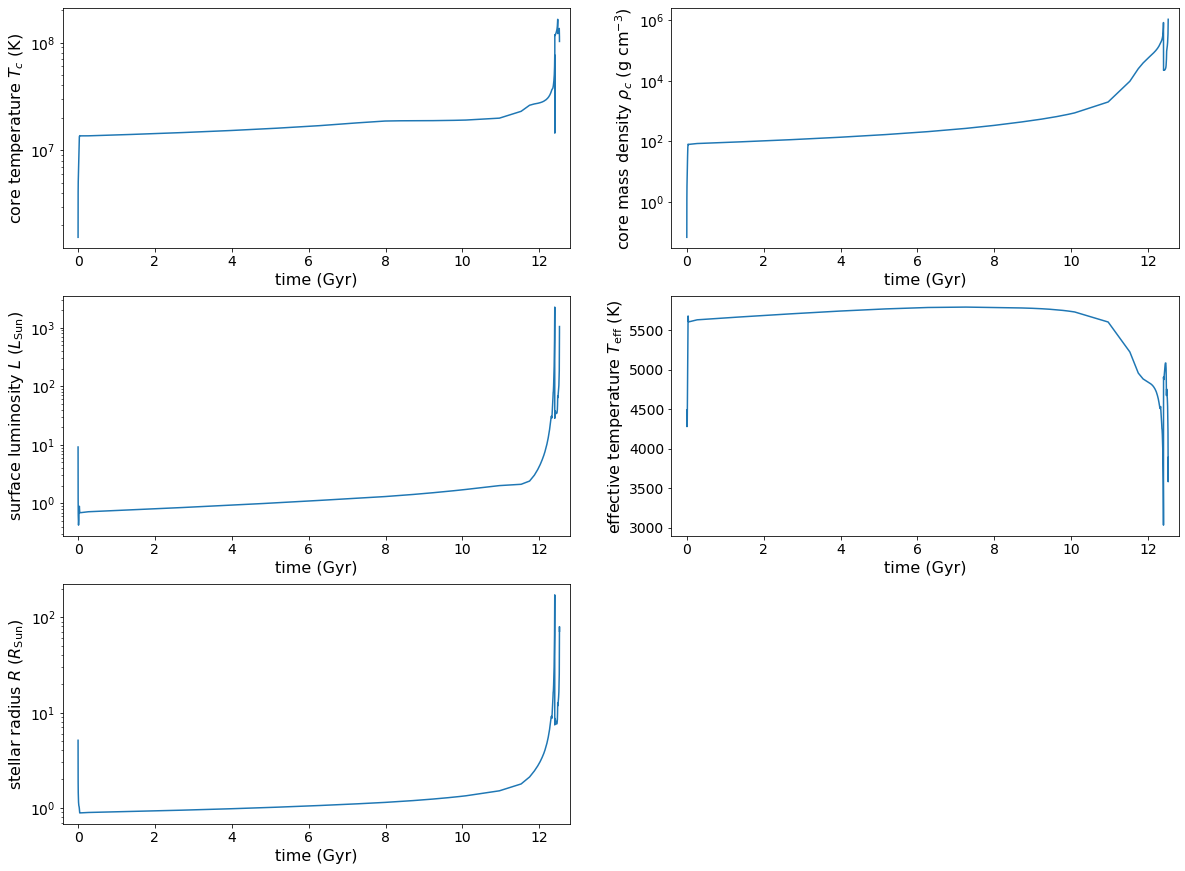

In [31]:
# change these values if you want to Zoom in to a certain time range
tstart=-0.4; tstop=12.8

fig, axArr = plt.subplots(3,2,figsize=(20,15))
#plt.figure(figsize=(5,4))
axArr[0,0].semilogy(d.data('star_age')/1e9,10**d.data('log_center_T'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel('time (Gyr)',fontsize=16); axArr[0,0].set_ylabel(r'core temperature $T_c$ (K)',fontsize=16)
axArr[0,0].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[0,1].semilogy(d.data('star_age')/1e9,10**d.data('log_center_Rho'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel('time (Gyr)',fontsize=16); axArr[0,1].set_ylabel(r'core mass density $\rho_c$ (g cm$^{-3}$)',fontsize=16)
axArr[0,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,0].semilogy(d.data('star_age')/1e9,10**d.data('log_L'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel('time (Gyr)',fontsize=16); axArr[1,0].set_ylabel(r'surface luminosity $L$ ($L_{\rm Sun}$)',fontsize=16)
axArr[1,0].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,1].plot(d.data('star_age')/1e9,10**d.data('log_Teff'))
#ax = plt.gca()
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel('time (Gyr)',fontsize=16); axArr[1,1].set_ylabel(r'effective temperature $T_{\rm eff}$ (K)',fontsize=16)
axArr[1,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[2,0].semilogy(d.data('star_age')/1e9,10**d.data('log_R'))
#ax = plt.gca()
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel('time (Gyr)',fontsize=16); axArr[2,0].set_ylabel(r'stellar radius $R$ ($R_{\rm Sun}$)',fontsize=16)
axArr[2,0].set_xlim(tstart,tstop)

fig.delaxes(axArr[2,1])

### 3. let's look at the radial structure of the main sequence star

where in radius do you think is the outer boundary of the "core" and why? how much of the enclosed mass is in the core?

are the conditions what you expect for a main sequence star in terms of core temperature and energy generation?

how does the density profile compare to what we assumed in HW3 problem 1?

(-0.05, 1.05)

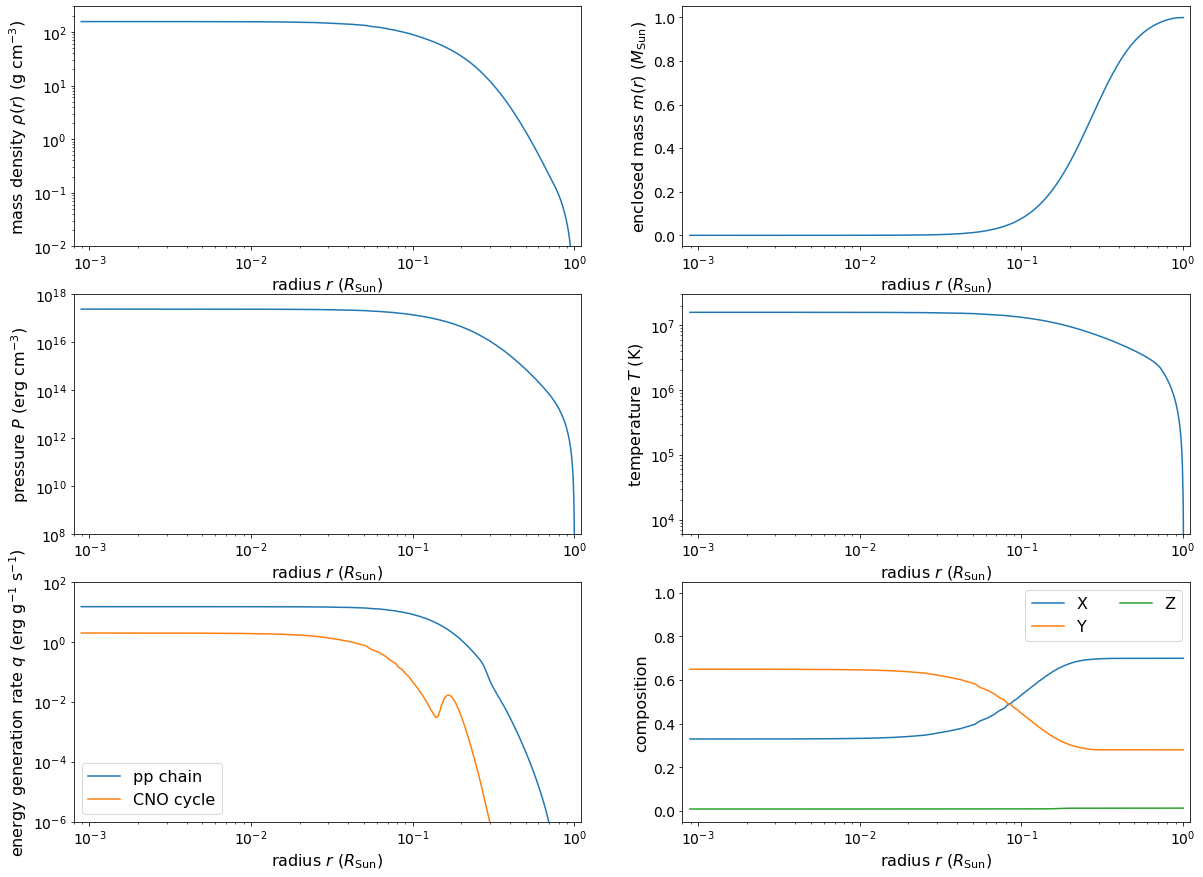

In [33]:
rstart=8e-4; rstop=1.1

fig, axArr = plt.subplots(3,2,figsize=(20,15))

axArr[0,0].loglog(ms.data('r_equatorial'),10**ms.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-2,3e2)

axArr[0,1].semilogx(ms.data('r_equatorial'),ms.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(ms.data('r_equatorial'),ms.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e8,1e18)

axArr[1,1].loglog(ms.data('r_equatorial'),10**ms.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,3e7)

axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('pp'),label='pp chain')
axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e2)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('h1'),label='X')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('he4'),label='Y')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('c12')+ms.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

### 4. what happens just after the star leaves the main sequence?
for this part refer to the plots from Q2 as well as the new ones below showing the changes in composition over time

the main sequence is the phase where the star is burning hydrogen in the core. Is most of the hydrogen in the star converted to helium during this phase?

just afterwards, is the core hot enough to burn He? what nuclear fuel is being consumed?

given the star's location on the HR diagram (and/or its radius), what phase do you think this might be?

(-0.4, 12.8)

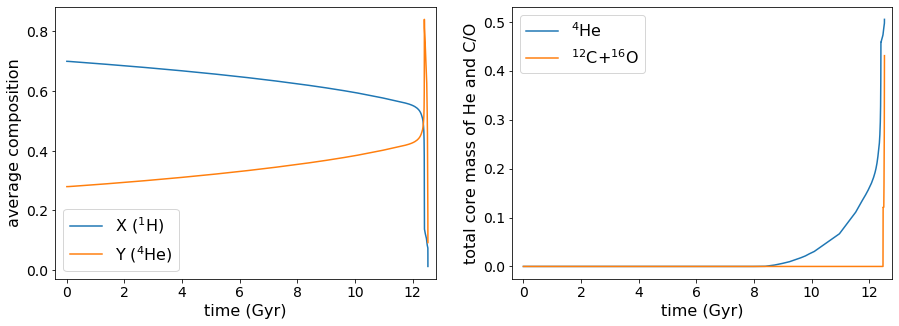

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_h1'),label=r'X ($^1$H)')
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_he4'),label=r'Y ($^4$He)')
ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('time (Gyr)',fontsize=16); ax1.set_ylabel(r'average composition',fontsize=16)
ax1.set_xlim(tstart,tstop)

ax2.plot(d.data('star_age')/1e9,d.data('he_core_mass'),label='$^4$He')
ax2.plot(d.data('star_age')/1e9,d.data('c_core_mass'),label='$^{12}$C$+^{16}$O')
ax2.legend(fontsize=16)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xlabel('time (Gyr)',fontsize=16); ax2.set_ylabel(r'total core mass of He and C/O',fontsize=16)
ax2.set_xlim(tstart,tstop)

### 5. radial structure after leaving the main sequence
how does the radial structure of the star compare to when it was on the main sequence, e.g. in terms of the central  and surface density and total radius and mass? make sure to check the numerical values of the graphs as well as their shapes!

how has the composition of the core of the star changed? where is nuclear fusion occuring in the star during this phase? what is the main nuclear reaction chain taking place? is the peak energy generation rate smaller or larger than it was on the main sequence?

(-0.05, 1.05)

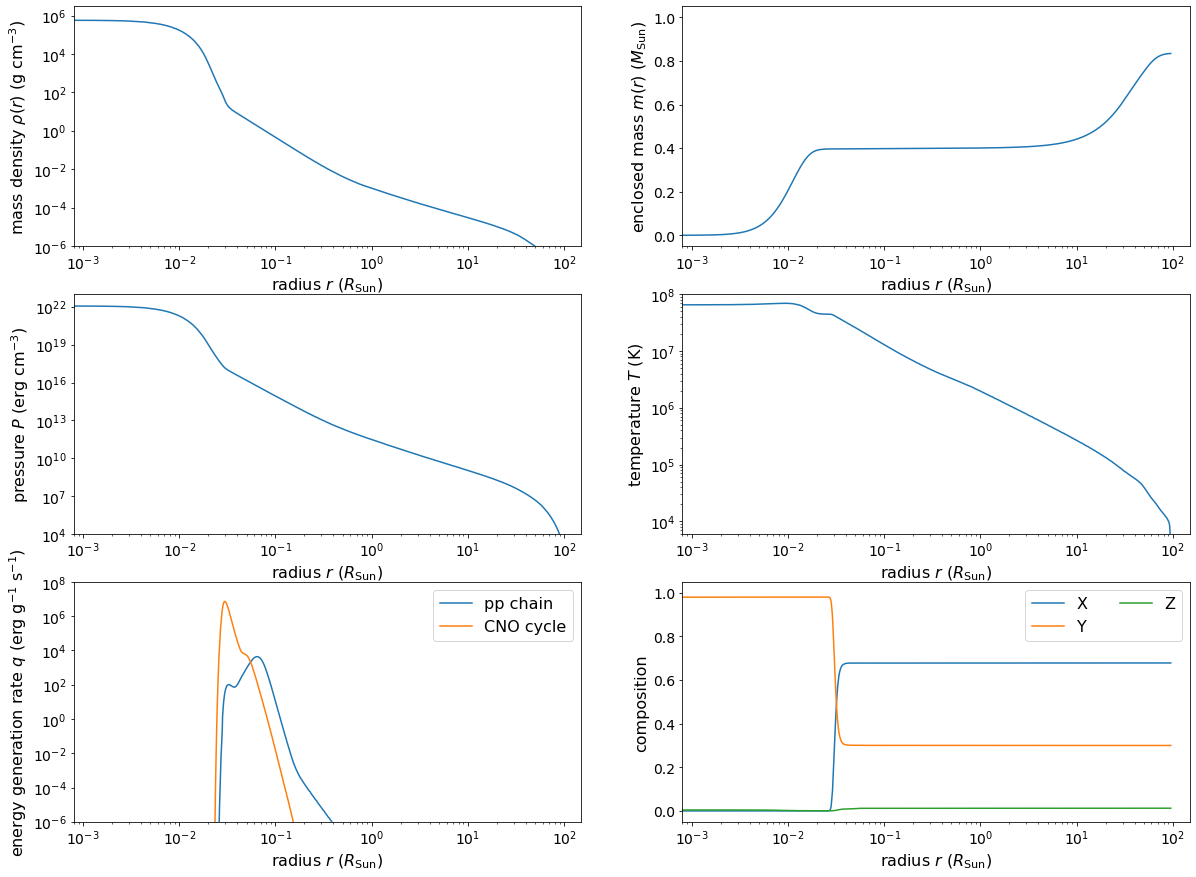

In [40]:
rstart=8e-4; rstop=1.5e2

fig, axArr = plt.subplots(3,2,figsize=(20,15))
axArr[0,0].loglog(rg.data('r_equatorial'),10**rg.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-6,3e6)

axArr[0,1].semilogx(rg.data('r_equatorial'),rg.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(rg.data('r_equatorial'),rg.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e4,1e23)

axArr[1,1].loglog(rg.data('r_equatorial'),10**rg.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,1e8)

axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('pp'),label='pp chain')
axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e8)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('h1'),label='X')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('he4'),label='Y')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('c12')+rg.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

### 6. Summary and further evolution

the next phases get even more extreme. When does 4He start fusing in the core (the "helium flash")? Does that make sense in terms of the core temperature?

Based on the graphs in Q2, why are the phases following the main sequence so much shorter? You might reason in terms of energy balance (fuel consumption) or core temperature (luminosity)

Optional to find on your own using the data object d: 

--according to this calculation, what are the "final" mass and radius of the star? How can you explain that result for the mass?

--what is the core made of in the end state?

Note that the later stages starting with the "helium flash" are uncertain, and the details e.g. numbers for real stars have some uncertainty